In [85]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

In [86]:
classes = np.array(['Acura Integra Type R 2001', 'Acura RL Sedan 2012'])

In [87]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/test/' + classes[i] + '/*.jpg') 
    for imgPath in imagePaths:
        img = Image.open(imgPath).convert("RGB")
        img = img.resize((200, 200))
        img.load()
        data = np.asarray(img, dtype="int32")
        images.append(data)
        image_classes.append(i)

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)

(76, 200, 200, 3)
(76,)


In [88]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes)

In [89]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 200, 200, 3)
(19, 200, 200, 3)
(57,)
(19,)


In [90]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (57, 200, 200, 3)
y_train shape: (57,)
x_test shape: (19, 200, 200, 3)
y_test shape: (19,)


Acura Integra Type R 2001


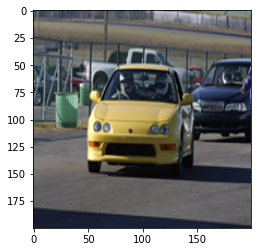

In [91]:
plt.imshow(x_train[0])
print(classes[y_train[0]])

In [92]:
# previous shape
print(y_train.shape)
print(y_test.shape)


(57,)
(19,)


In [93]:
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))

In [94]:
# after shape
print(y_train.shape)
print(y_test.shape)

(57, 2)
(19, 2)


In [95]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

[[[[0.2509804  0.30588236 0.3764706 ]
   [0.30588236 0.3647059  0.4392157 ]
   [0.24705882 0.29411766 0.3647059 ]
   ...
   [0.654902   0.6745098  0.7254902 ]
   [0.5294118  0.5529412  0.59607846]
   [0.4627451  0.47843137 0.5294118 ]]

  [[0.25882354 0.30980393 0.38431373]
   [0.30980393 0.3647059  0.4509804 ]
   [0.24313726 0.28627452 0.3647059 ]
   ...
   [0.57254905 0.6117647  0.64705884]
   [0.52156866 0.5647059  0.5921569 ]
   [0.47843137 0.5176471  0.54901963]]

  [[0.2627451  0.30588236 0.38039216]
   [0.31764707 0.36862746 0.4627451 ]
   [0.24313726 0.28235295 0.37254903]
   ...
   [0.4862745  0.54901963 0.5647059 ]
   [0.49019608 0.56078434 0.5647059 ]
   [0.4862745  0.54901963 0.56078434]]

  ...

  [[0.09019608 0.10980392 0.18039216]
   [0.09019608 0.11372549 0.18431373]
   [0.09019608 0.11372549 0.18431373]
   ...
   [0.20784314 0.21568628 0.2627451 ]
   [0.21176471 0.21960784 0.25882354]
   [0.23137255 0.23529412 0.2784314 ]]

  [[0.09411765 0.11372549 0.1882353 ]
   [0.0

In [96]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)      

In [97]:
for layer in model.layers:
  layer.trainable = False

In [98]:
# model.add(Dense(128, activation="relu"))
model.add(Flatten())
model.add(Dense(len(classes), activation="softmax"))

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)      

In [ ]:
print(x_test.shape)
print(y_test.shape)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer="adam")

model.fit(x_train, y_train, epochs=5, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

(19, 200, 200, 3)
(19, 2)
Train on 57 samples, validate on 19 samples
Epoch 1/5
57/57 [==============================] - 55s 966ms/sample - loss: 0.8997 - val_loss: 0.9347
Epoch 2/5
57/57 [==============================] - 54s 942ms/sample - loss: 0.6917 - val_loss: 0.4415
Epoch 3/5
57/57 [==============================] - 54s 939ms/sample - loss: 0.3178 - val_loss: 0.6865
Epoch 4/5
57/57 [==============================] - 54s 939ms/sample - loss: 0.3307 - val_loss: 0.3975
Epoch 5/5
32/57 [===============>..............] - ETA: 17s - loss: 0.1202

In [ ]:



pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))



In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))